In [10]:
import numpy as np
%matplotlib qt
import matplotlib.pyplot as plt
from tqdm import tqdm
from skimage.morphology import binary_erosion, square
import cv2

In [8]:
# Import a few sample images
img1 = plt.imread('Extracted Characters/sample1.png')
img2 = plt.imread('Extracted Characters/sample2.png')
img3 = plt.imread('Extracted Characters/sample3.png')
print(f'img1.shape: {img1.shape}')
print(f'img2.shape: {img2.shape}')
print(f'img3.shape: {img3.shape}')

img1.shape: (350, 462, 3)
img2.shape: (292, 333, 3)
img3.shape: (356, 311, 3)


In [22]:
# Scale and pad

# Based on tutorial: https://jdhao.github.io/2017/11/06/resize-image-to-square-with-padding/
def make_square(img, desired_size=256, fill_color=[255, 255, 255]):
    scale_factor = desired_size/max(img.shape[0], img.shape[1])
    resized = cv2.resize(img, (int(scale_factor*img.shape[0]), int(scale_factor*img.shape[1])))
    new_size = resized.shape
    
    delta_w = desired_size - new_size[1]
    delta_h = desired_size - new_size[0]
    top, bottom = delta_h//2, delta_h-(delta_h//2)
    left, right = delta_w//2, delta_w-(delta_w//2)
    
    out = cv2.copyMakeBorder(resized, top, bottom, left, right, cv2.BORDER_CONSTANT, value=fill_color)
    return out

img1_square = make_square((255*img1).astype(np.uint8))
img2_square = make_square((255*img2).astype(np.uint8))
img3_square = make_square((255*img3).astype(np.uint8))
print(f'img1_square.shape: {img1_square.shape}')
print(f'img2_square.shape: {img2_square.shape}')
print(f'img3_square.shape: {img3_square.shape}')

img1_square.shape: (256, 256, 3)
img2_square.shape: (256, 256, 3)
img3_square.shape: (256, 256, 3)


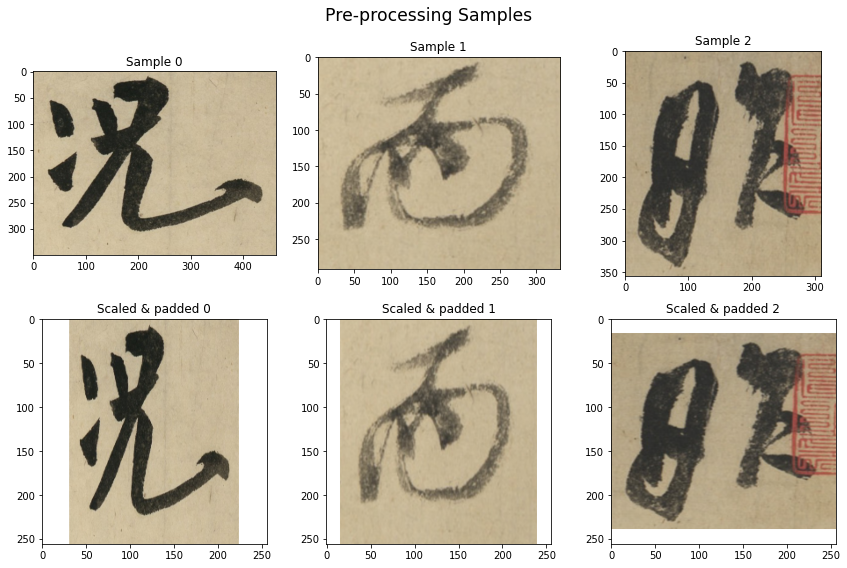

In [26]:
num_rows = 2
num_cols = 3
fig, axes = plt.subplots(num_rows, num_cols, figsize=(4*num_cols, 4*num_rows))
for i, img in enumerate([img1, img2, img3]):
    axes[0, i].imshow(img)
    axes[0, i].set_title(f'Sample {i}')
for i, img in enumerate([img1_square, img2_square, img3_square]):
    axes[1, i].imshow(img)
    axes[1, i].set_title(f'Scaled & padded {i}')
    
plt.suptitle('Pre-processing Samples', fontsize='xx-large')
plt.tight_layout()
plt.savefig('PreprocessingSamples.png')

In [12]:
max(img1.shape[0], img1.shape[1])

462

In [14]:
256/462 * 462

256.0

In [15]:
256/462 * 350

193.93939393939394